## Юнит-экономика

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


### Описание данных
Три датасета. 
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
Структура visits_info_short.csv:
    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.

Структура costs_info_short.csv:
    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

In [3]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# загружаем данные о визитах
visits = pd.read_csv('visits_info_short.csv')

# загружаем данные о заказах
orders = pd.read_csv('orders_info_short.csv')

# загружаем данные о затратах на рекламу
costs = pd.read_csv('costs_info_short.csv')

### Загрузка данных и их предобработка

In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [6]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [7]:
#изменим название столбца channel на то же, но c маленькой буквы
costs = costs.rename(columns = {'Channel': 'channel'})
list(costs)

['dt', 'channel', 'costs']

In [8]:
#проверим на неявные дубликаты названия каналов
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

In [9]:
#преобразуем данные
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
costs.duplicated().sum()

0

In [11]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [14]:
#переимненуем столбцы
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
list(visits)

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [15]:
#проверим на неявные дубликаты названия каналов
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [16]:
#проверим на неявные дубликаты названия регионов
visits['region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [17]:
#проверим на неявные дубликаты названия девайсов
visits['device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [18]:
visits.duplicated().sum()

0

In [19]:
#преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start']).dt.date
visits['session_end'] = pd.to_datetime(visits['session_end']).dt.date
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01,2019-05-01
1,278965908054,United States,iPhone,organic,2019-05-01,2019-05-01
2,590706206550,United States,Mac,organic,2019-05-01,2019-05-01
3,326433527971,United States,Android,TipTop,2019-05-01,2019-05-01
4,349773784594,United States,Mac,organic,2019-05-01,2019-05-01


In [20]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [21]:
#переимненуем столбцы
orders.columns = ['user_id', 'event_dt', 'revenue']

In [22]:
list(orders)

['user_id', 'event_dt', 'revenue']

In [23]:
orders.duplicated().sum()

0

In [24]:
#преобразуем данные о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01,4.99
1,174361394180,2019-05-01,4.99
2,529610067795,2019-05-01,4.99
3,319939546352,2019-05-01,4.99
4,366000285810,2019-05-01,4.99



### Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Создадим таблицу с профилями пользователей

In [27]:
#функция для создания профиля пользователя
def get_profiles(visits, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts']
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['month'] = profiles['first_ts'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return new_users, ad_costs, profiles  

In [28]:
new_users, ad_costs, profiles = get_profiles(visits, orders, costs)

In [29]:
new_users.head()

,dt,channel,unique_users
0,2019-05-01,AdNonSense,39
1,2019-05-01,FaceBoom,104
2,2019-05-01,LeapBob,12
3,2019-05-01,MediaTornado,26
4,2019-05-01,OppleCreativeMedia,18


In [30]:
ad_costs.head()

,dt,channel,costs,unique_users,acquisition_cost
0,2019-05-01,FaceBoom,113.3,104,1.089423
1,2019-05-02,FaceBoom,78.1,72,1.084722
2,2019-05-03,FaceBoom,85.8,76,1.128947
3,2019-05-04,FaceBoom,136.4,123,1.108943
4,2019-05-05,FaceBoom,122.1,113,1.080531


In [31]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


In [32]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:00')

Подсчитаем конверсию пользователей, для этого создадим функцию.
Для мобильных приложений неделя считается оптимальныи горизоном для анализа 14 дней и дата анализа -  1 ноября 2019 года

In [34]:
#функциия для подсчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    accept_horizon=True,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if accept_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['event_dt'] = pd.to_datetime(result_raw['event_dt'])
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Подсчитаем удержание пользователей, для этого также создадим функцию.

In [36]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    accept_horizon=True,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if accept_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['session_start'] = pd.to_datetime(result_raw['session_start'])
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]
# функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes
    
     # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [38]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


In [39]:
#Минимальная дапта привлечения пользователя. Самая рання дата, когда впервые какой-либо пользователь использовал приложение
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [40]:
#Максимальная дапта привлечения пользователя. Самая позднаяя дата выборки, 
#когда впервые какой-либо пользователь использовал приложение.Она же observartion date
profiles['dt'].max()

datetime.date(2019, 10, 27)

Мы сформировали профили пользователя, где для каждого пользователя указаны user_id, дата первого использования приложежния, источник трафика - рекламные сети (какие именно) или органика, устройство пользователя, регион, дата  и месяц привлечения, пользователь платящий или нет.
(2019, 5, 1) - Минимальная дапта привлечения пользователя. Самая рання дата, когда впервые какой-либо пользователь использовал приложение
(2019, 10, 27) - Максимальная дапта привлечения пользователя. Самая позднаяя дата выборки, 
#когда впервые какой-либо пользователь использовал приложение.Она же observartion date

In [42]:
profiles.pivot_table(index=['region'], columns='payer', values='user_id', aggfunc='count', margins=True)

payer,False,True,All
region,,,
France,16787,663,17450
Germany,14365,616,14981
UK,16875,700,17575
United States,93100,6902,100002
All,141127,8881,150008


In [43]:
(profiles.pivot_table(index=['region'], values='payer', aggfunc=['count', 'mean'], margins=True).\
sort_values(by=('count', 'payer'), ascending=False))

,count,mean
,payer,payer
region,,
All,150008,0.059204
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


Наибольшее количество пользователей в приложение приходит из США, и именно в этой стране в целом выше доля платящих - на уровне 7%, меньше всего пользователей из Германии.

In [45]:
profiles.pivot_table(index=['device'], columns='payer', values='user_id', aggfunc=['count']).\
sort_values(by=('count', True), ascending=False)

count      
payer    False True 
device              
iPhone   51097  3382
Android  32982  2050
Mac      28130  1912
PC       28918  1537

In [46]:
profiles.pivot_table(index=['device'], values='payer', aggfunc=['count', 'mean']).\
sort_values(by=('count', 'payer'), ascending=False)

,count,mean
,payer,payer
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


Наибольшее популярный девайс - это айфон, у всех пользователей - платящих и неплатящих, с долей платящих пользователей 6,2%. Самая низкая доля платящих - это клиенты PC - 5%.
Обращает внимание на себя тот факт, что количество Mac и PC пользователей не очень отличается, но при этом платных пользователей Мака больше, чем PС: 6,3% vs 5 %

In [48]:
#каналы с сортировкой по доле платящих
profiles.pivot_table(index=['channel'], values=['payer','acquisition_cost'], \
                     aggfunc={"payer":['count', 'mean'], "acquisition_cost":'mean'}).\
sort_values(by=('payer', 'mean'), ascending=False)


acquisition_cost  payer          
                               mean  count      mean
channel                                             
FaceBoom                   1.113286  29144  0.122049
AdNonSense                 1.008054   3880  0.113402
lambdaMediaAds             0.724802   2149  0.104700
TipTop                     2.799003  19561  0.096007
RocketSuperAds             0.412095   4448  0.079137
WahooNetBanner             0.602245   8553  0.052964
YRabbit                    0.218975   4312  0.038265
MediaTornado               0.218717   4364  0.035747
LeapBob                    0.210172   8553  0.030633
OppleCreativeMedia         0.250000   8605  0.027077
organic                    0.000000  56439  0.020553

In [49]:
#каналы с сортировкой по количеству пришедших пользователей
profiles.pivot_table(index=['channel'], values=['payer','acquisition_cost'], \
                     aggfunc={"payer":['count', 'mean'], "acquisition_cost":'mean'}).\
sort_values(by=('payer', 'count'), ascending=False)


acquisition_cost  payer          
                               mean  count      mean
channel                                             
organic                    0.000000  56439  0.020553
FaceBoom                   1.113286  29144  0.122049
TipTop                     2.799003  19561  0.096007
OppleCreativeMedia         0.250000   8605  0.027077
LeapBob                    0.210172   8553  0.030633
WahooNetBanner             0.602245   8553  0.052964
RocketSuperAds             0.412095   4448  0.079137
MediaTornado               0.218717   4364  0.035747
YRabbit                    0.218975   4312  0.038265
AdNonSense                 1.008054   3880  0.113402
lambdaMediaAds             0.724802   2149  0.104700

In [50]:
#количество пользователей и доля платящих с разбивкой по каналам и устройства 
report = profiles.pivot_table(index=['channel'], columns='device', values='payer', aggfunc=['count', 'mean']).\
sort_values(by=('mean', 'Mac'), ascending=False)
report

count                           mean                      \
device             Android    Mac     PC iPhone   Android       Mac        PC   
channel                                                                         
FaceBoom              5875   7265   3008  12996  0.133447  0.121955  0.118684   
lambdaMediaAds         613    241    862    433  0.092985  0.107884  0.100928   
AdNonSense            1109    410   1563    798  0.106402  0.095122  0.122841   
TipTop                3889   4820   2012   8840  0.105168  0.091079  0.100895   
RocketSuperAds         928   1137    466   1917  0.058190  0.085312  0.070815   
WahooNetBanner        2577    856   3409   1711  0.057819  0.046729  0.054268   
MediaTornado           879   1105    453   1927  0.034130  0.039819  0.037528   
OppleCreativeMedia    2526    882   3496   1701  0.021378  0.038549  0.026602   
YRabbit                865   1097    482   1868  0.046243  0.037375  0.041494   
LeapBob               2580    880   3402   1691  0.033721  0.030682  0.031452   
organic              13191  11349  11302  20597  0.020317  0.021059  0.021501   

                              
device                iPhone  
channel                       
FaceBoom            0.117729  
lambdaMediaAds      0.127021  
AdNonSense          0.114035  
TipTop              0.093552  
RocketSuperAds      0.087637  
WahooNetBanner      0.046172  
MediaTornado        0.033731  
OppleCreativeMedia  0.030570  
YRabbit             0.034261  
LeapBob             0.024246  
organic             0.019906

In [51]:
report = report.T
report = report.reset_index().set_index('level_0')
report.rename(index={'count': 'users, в тыс.', 'mean':'% плятащих'}, inplace=True)
report= report.round(2)
report

channel,device,FaceBoom,lambdaMediaAds,AdNonSense,TipTop,RocketSuperAds,WahooNetBanner,MediaTornado,OppleCreativeMedia,YRabbit,LeapBob,organic
level_0,,,,,,,,,,,,
"users, в тыс.",Android,5875.00,613.00,1109.00,3889.00,928.00,2577.00,879.00,2526.00,865.00,2580.00,13191.00
"users, в тыс.",Mac,7265.00,241.00,410.00,4820.00,1137.00,856.00,1105.00,882.00,1097.00,880.00,11349.00
"users, в тыс.",PC,3008.00,862.00,1563.00,2012.00,466.00,3409.00,453.00,3496.00,482.00,3402.00,11302.00
"users, в тыс.",iPhone,12996.00,433.00,798.00,8840.00,1917.00,1711.00,1927.00,1701.00,1868.00,1691.00,20597.00
% плятащих,Android,0.13,0.09,0.11,0.11,0.06,0.06,0.03,0.02,0.05,0.03,0.02
% плятащих,Mac,0.12,0.11,0.10,0.09,0.09,0.05,0.04,0.04,0.04,0.03,0.02
% плятащих,PC,0.12,0.10,0.12,0.10,0.07,0.05,0.04,0.03,0.04,0.03,0.02
% плятащих,iPhone,0.12,0.13,0.11,0.09,0.09,0.05,0.03,0.03,0.03,0.02,0.02


In [52]:
#переведем пользователей в тысячи
report.loc[['users, в тыс.'], 'FaceBoom':] /= 1000

In [53]:
#и отобразим процент платящих в десятках
(report.loc[['% плятащих'], 'FaceBoom':]) = (report.loc[['% плятащих'], 'FaceBoom':])* 100

In [54]:
report

channel,device,FaceBoom,lambdaMediaAds,AdNonSense,TipTop,RocketSuperAds,WahooNetBanner,MediaTornado,OppleCreativeMedia,YRabbit,LeapBob,organic
level_0,,,,,,,,,,,,
"users, в тыс.",Android,5.875,0.613,1.109,3.889,0.928,2.577,0.879,2.526,0.865,2.580,13.191
"users, в тыс.",Mac,7.265,0.241,0.410,4.820,1.137,0.856,1.105,0.882,1.097,0.880,11.349
"users, в тыс.",PC,3.008,0.862,1.563,2.012,0.466,3.409,0.453,3.496,0.482,3.402,11.302
"users, в тыс.",iPhone,12.996,0.433,0.798,8.840,1.917,1.711,1.927,1.701,1.868,1.691,20.597
% плятащих,Android,13.000,9.000,11.000,11.000,6.000,6.000,3.000,2.000,5.000,3.000,2.000
% плятащих,Mac,12.000,11.000,10.000,9.000,9.000,5.000,4.000,4.000,4.000,3.000,2.000
% плятащих,PC,12.000,10.000,12.000,10.000,7.000,5.000,4.000,3.000,4.000,3.000,2.000
% плятащих,iPhone,12.000,13.000,11.000,9.000,9.000,5.000,3.000,3.000,3.000,2.000,2.000


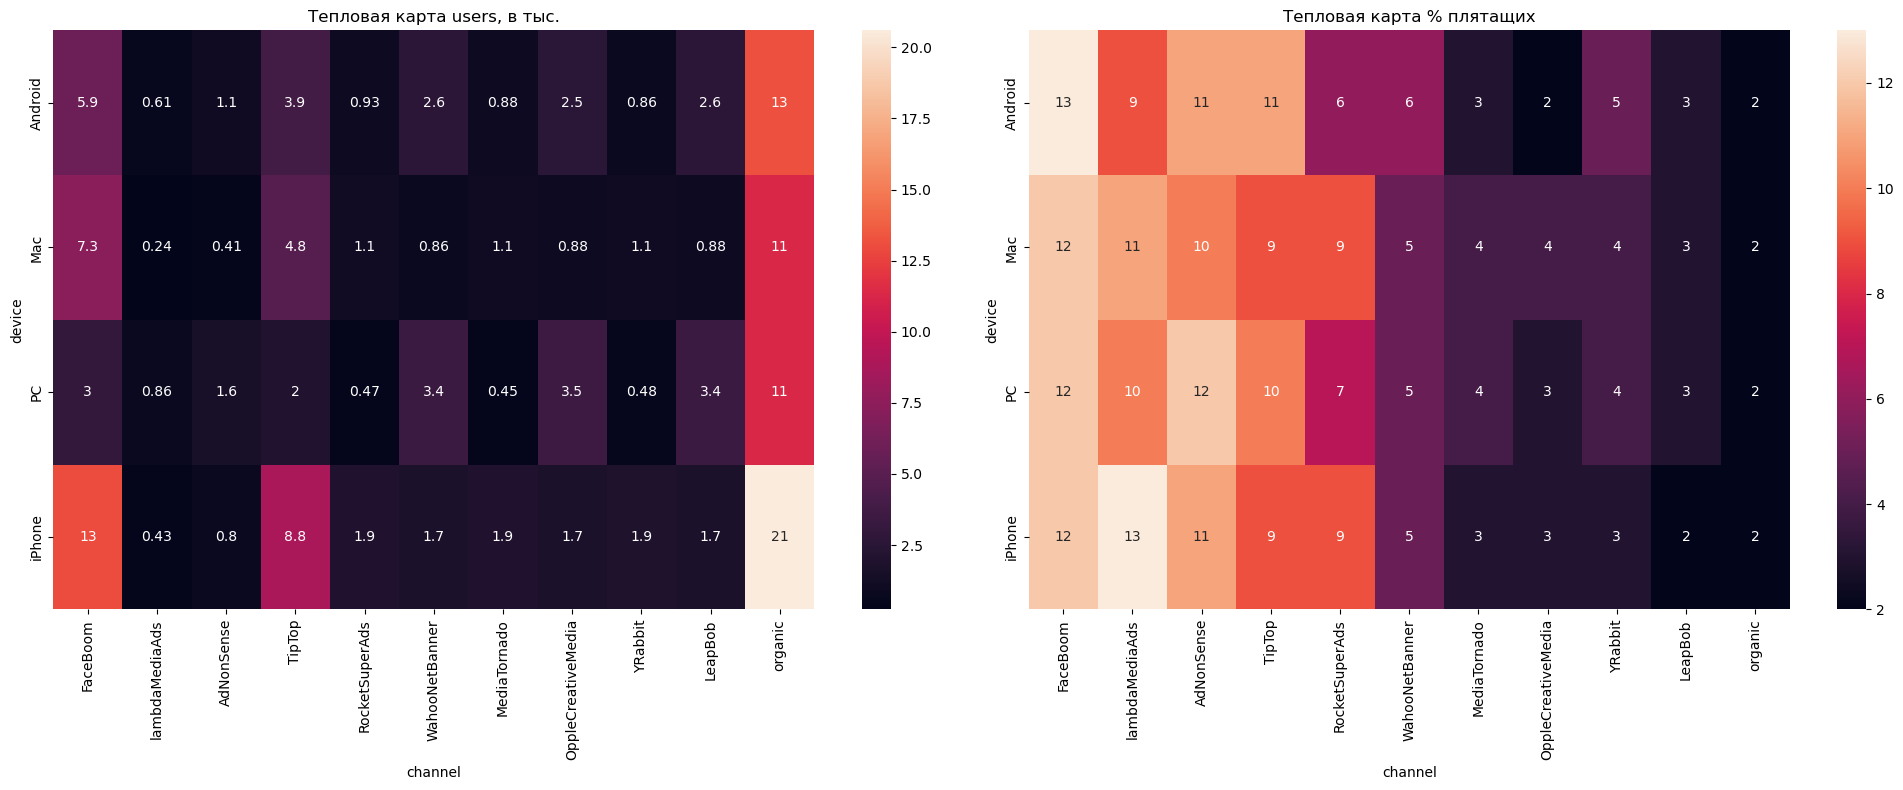

In [55]:
plt.figure(figsize=(20, 8)) # задаём размер сетки для графиков

for i, level in enumerate(report.index.unique()):
    sns.heatmap(
        report.query('level_0 == @level')
        # исключаем размеры когорт и удержание первого дня
        .set_index('device'),
        # добавляем подписи значений
        annot=True,
        # переводим значения в проценты
        #fmt='.2%',
        # строим каждый график в своей ячейке
        ax=plt.subplot(1, 2, i + 1),
    )
    # задаём названия графиков с учётом значения payer
    plt.title('Тепловая карта {}'.format(level))

plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
plt.show()

Наибольшее количество клиентов привлекается органическим трафиком, но он приносят меньше всего платящих клиентов - 2%.
Второй по полулярности источник пользователей - это FaceBoom с наибольшей долей платных юзеров - 12%
Третий - TipTop, с долей платных -  9,6%.
А вот например, lambdaMediaAds тоже с высокой долей платных пользователей - 10,5% приводит наименьшее число пользователей среди всех каналов.

### 1.5. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [58]:
#Общая сумма расходов на маркетинг и как она распределены по рекламным источникам
advert_costs = (costs.pivot_table(index='channel', values='costs', aggfunc='sum', margins=True).\
               sort_values(by='costs')).reset_index()
advert_costs

,channel,costs
0,YRabbit,944.22
1,MediaTornado,954.48
2,lambdaMediaAds,1557.60
3,LeapBob,1797.60
4,RocketSuperAds,1833.00
5,OppleCreativeMedia,2151.25
6,AdNonSense,3911.25
7,WahooNetBanner,5151.00
8,FaceBoom,32445.60
9,TipTop,54751.30


In [59]:
advert_costs['costs_%'] = round((advert_costs.iloc[0:10, 1]/advert_costs.iloc[10, 1]*100), 0)

In [60]:
advert_costs

,channel,costs,costs_%
0,YRabbit,944.22,1.0
1,MediaTornado,954.48,1.0
2,lambdaMediaAds,1557.60,1.0
3,LeapBob,1797.60,2.0
4,RocketSuperAds,1833.00,2.0
5,OppleCreativeMedia,2151.25,2.0
6,AdNonSense,3911.25,4.0
7,WahooNetBanner,5151.00,5.0
8,FaceBoom,32445.60,31.0
9,TipTop,54751.30,52.0


In [61]:
costs['dt'] = costs['dt'].astype("datetime64[ns]")
costs['week'] = costs['dt'].dt.isocalendar().week

In [62]:
costs['month'] = costs['dt'].dt.month

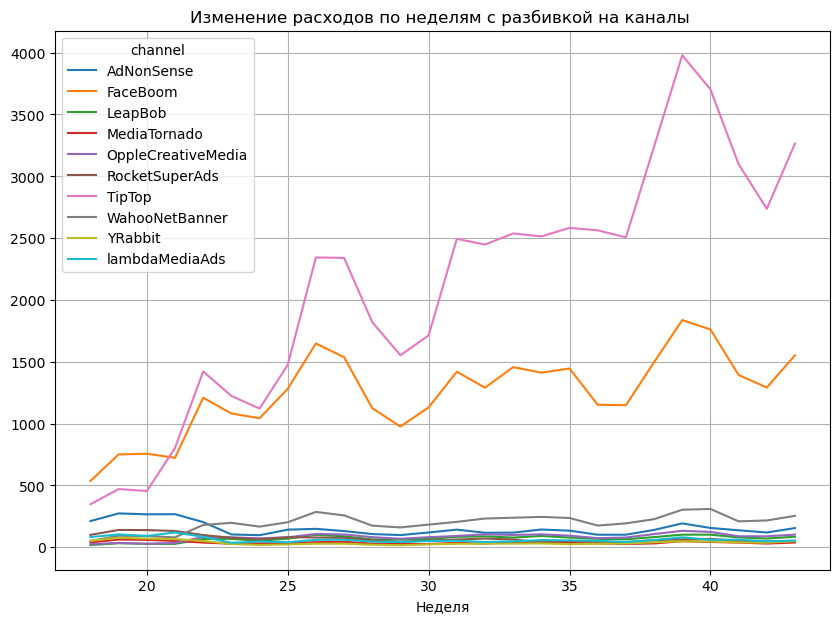

In [63]:
#Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(10, 7)) 

plt.xlabel('Неделя')
plt.title('Изменение расходов по неделям с разбивкой на каналы ')
plt.show()

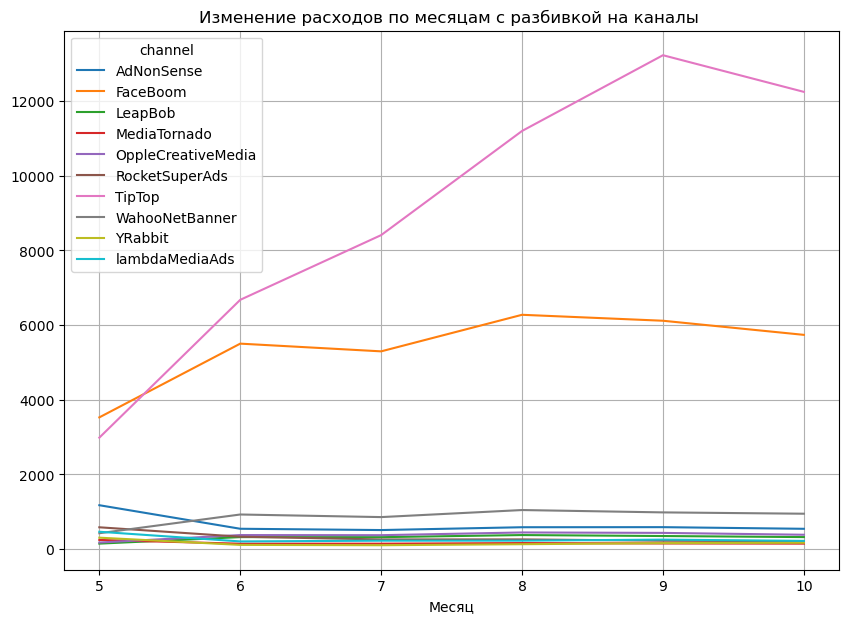

In [64]:
#Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(10, 7)) 

plt.xlabel('Месяц')
plt.title('Изменение расходов по месяцам с разбивкой на каналы ')

plt.show()

Затраты на маркетинг составили 105497.30$. ТОП затрат - это сети TipTop, FaceBoom - 52% и 31% соответственно.
На графике мы видим в динамике, как растут расходы на два данных топовых канала и практически не меняются расходы на остальные каналы.
ИНТЕРЕСНО, А ЧТО ПРОИСХОДИТ СО СТОИМОСТЬЮ ПРИВЛЕЧЕНИЯ ОДНОГО ПОЛЬЗОВАТЕЛЯ ПО ЭТИМ КАНАЛАМ В ДИНАМИКЕ И С LTV.


### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [67]:
# функция для расчета LTV и ROI: observation_date - 01.11.2019, horizon_days - 14
# функция для расчёта LTV и ROI

def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    accept_horizon=True,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if accept_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['event_dt'] = pd.to_datetime(result_raw['event_dt'])
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [68]:
result_raw_ltv_roi, result_grouped_ltv, result_in_time_ltv, \
roi_grouped, roi_in_time = get_ltv_roi(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

In [69]:
result_raw_ltv_roi.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime
0,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-07,4.99,0.0
1,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-08,4.99,1.0
2,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-09,4.99,2.0
3,4919697,2019-07-09,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,NaT,NaN,NaN
4,6085896,2019-10-01,organic,iPhone,France,2019-10-01,10,False,0.000000,NaT,NaN,NaN


In [70]:
result_grouped_ltv.sort_values(by=13, ascending=False)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
lambdaMediaAds,2056,0.326250,0.554966,0.708405,0.852130,0.978351,1.092471,1.216255,1.306055,1.398769,1.478867,1.540516,1.608473,1.647305,1.727412
TipTop,18498,0.253977,0.425787,0.563761,0.685875,0.795469,0.891622,0.974126,1.052851,1.131681,1.213759,1.275753,1.344059,1.399529,1.458396
RocketSuperAds,4251,0.147466,0.261569,0.350334,0.436024,0.487205,0.540499,0.609777,0.661430,0.706036,0.761936,0.814768,0.846697,0.882152,0.917368
WahooNetBanner,8082,0.139180,0.239349,0.333837,0.413500,0.479812,0.547241,0.606540,0.658419,0.703000,0.748816,0.793395,0.832540,0.872801,0.903796
AdNonSense,3702,0.457853,0.554095,0.628241,0.668682,0.693214,0.725573,0.743366,0.760889,0.777064,0.794595,0.806996,0.812388,0.827215,0.833963
FaceBoom,27544,0.541385,0.633425,0.685612,0.716701,0.740259,0.754933,0.768196,0.778160,0.789867,0.797695,0.805160,0.808965,0.816215,0.820563
YRabbit,4102,0.132867,0.190066,0.234103,0.275463,0.323396,0.368430,0.403708,0.426821,0.451153,0.466967,0.491297,0.518064,0.532662,0.549937
MediaTornado,4167,0.105863,0.173413,0.220595,0.274507,0.306839,0.347816,0.377756,0.401709,0.428056,0.446021,0.475961,0.497516,0.516676,0.531049
LeapBob,8103,0.079210,0.134760,0.185877,0.219255,0.249062,0.276899,0.300300,0.325795,0.354753,0.383707,0.405261,0.427432,0.447755,0.466230


In [71]:
result_in_time_ltv.head()

cohort_size       0.0       1.0       2.0       3.0  \
channel    dt                                                                
AdNonSense 2019-05-01           39  0.255897  0.383846  0.383846  0.383846   
           2019-05-02           36  0.000000  0.000000  0.000000  0.000000   
           2019-05-03           45  0.221778  0.354889  0.465778  0.465778   
           2019-05-04           51  0.391373  0.489216  0.587059  0.587059   
           2019-05-05           36  0.720833  0.859444  0.859444  0.859444   

                            4.0       5.0       6.0       7.0       8.0  \
channel    dt                                                             
AdNonSense 2019-05-01  0.383846  0.511795  0.511795  0.511795  0.511795   
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
           2019-05-03  0.465778  0.465778  0.465778  0.465778  0.465778   
           2019-05-04  0.587059  0.587059  0.587059  0.587059  0.587059   
           2019-05-05  0.859444  0.859444  0.859444  0.859444  0.859444   

                            9.0      10.0      11.0      12.0      13.0  
channel    dt                                                            
AdNonSense 2019-05-01  0.511795  0.511795  0.511795  0.511795  0.511795  
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000  
           2019-05-03  0.465778  0.465778  0.465778  0.576667  0.576667  
           2019-05-04  0.587059  0.587059  0.587059  0.587059  0.587059  
           2019-05-05  0.859444  0.859444  0.859444  0.998056  0.998056

In [72]:
roi_grouped.sort_values(by=13, ascending = False)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
YRabbit,4102,0.217087,0.612045,0.875529,1.078384,1.268908,1.489708,1.697155,1.859662,1.966131,2.078215,2.151063,2.263136,2.386439,2.453683,2.533257
MediaTornado,4167,0.219035,0.483314,0.791710,1.007122,1.253254,1.400868,1.587946,1.724636,1.833991,1.954280,2.036298,2.172988,2.271398,2.358872,2.424489
lambdaMediaAds,2056,0.727237,0.448616,0.763115,0.974104,1.171736,1.345298,1.502220,1.672432,1.795914,1.923402,2.033541,2.118312,2.211758,2.265155,2.375308
LeapBob,8103,0.210000,0.377191,0.641714,0.885128,1.044070,1.186010,1.318565,1.429999,1.551407,1.689298,1.827177,1.929814,2.035390,2.132167,2.220142
RocketSuperAds,4251,0.417431,0.353271,0.626616,0.839262,1.044542,1.167151,1.294821,1.460783,1.584525,1.691383,1.825297,1.951862,2.028352,2.113288,2.197650
OppleCreativeMedia,8139,0.249908,0.322861,0.479892,0.593235,0.760595,0.900447,1.023648,1.107060,1.215501,1.290128,1.361278,1.432915,1.487380,1.561023,1.619902
WahooNetBanner,8082,0.601856,0.231251,0.397685,0.554679,0.687042,0.797221,0.909255,1.007783,1.093981,1.168054,1.244178,1.318248,1.383288,1.450183,1.501682
AdNonSense,3702,1.008023,0.454209,0.549685,0.623241,0.663360,0.687697,0.719798,0.737449,0.754833,0.770879,0.788271,0.800573,0.805922,0.820631,0.827325
FaceBoom,27544,1.113419,0.486237,0.568901,0.615772,0.643694,0.664852,0.678032,0.689943,0.698892,0.709408,0.716438,0.723143,0.726560,0.733071,0.736976


In [73]:
roi_in_time.head()

cohort_size       cac       0.0       1.0       2.0  \
channel    dt                                                                
AdNonSense 2019-05-01           39  1.050000  0.243712  0.365568  0.365568   
           2019-05-02           36  0.962500  0.000000  0.000000  0.000000   
           2019-05-03           45  1.050000  0.211217  0.337989  0.443598   
           2019-05-04           51  1.008824  0.387949  0.484937  0.581924   
           2019-05-05           36  1.020833  0.706122  0.841905  0.841905   

                            3.0       4.0       5.0       6.0       7.0  \
channel    dt                                                             
AdNonSense 2019-05-01  0.365568  0.365568  0.487424  0.487424  0.487424   
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
           2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
           2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
           2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   

                            8.0       9.0      10.0      11.0      12.0  \
channel    dt                                                             
AdNonSense 2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
           2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
           2019-05-03  0.443598  0.443598  0.443598  0.443598  0.549206   
           2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
           2019-05-05  0.841905  0.841905  0.841905  0.841905  0.977687   

                           13.0  
channel    dt                    
AdNonSense 2019-05-01  0.487424  
           2019-05-02  0.000000  
           2019-05-03  0.549206  
           2019-05-04  0.581924  
           2019-05-05  0.977687

In [74]:
#ФУНКЦИЯ ДЛЯ СГЛАЖИВАНИЯ ФРЕЙМА

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


#ФУНКЦИЯ ДЛЯ ВИЗУАЛИЗАЦИИ LTV И ROI - sharey

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

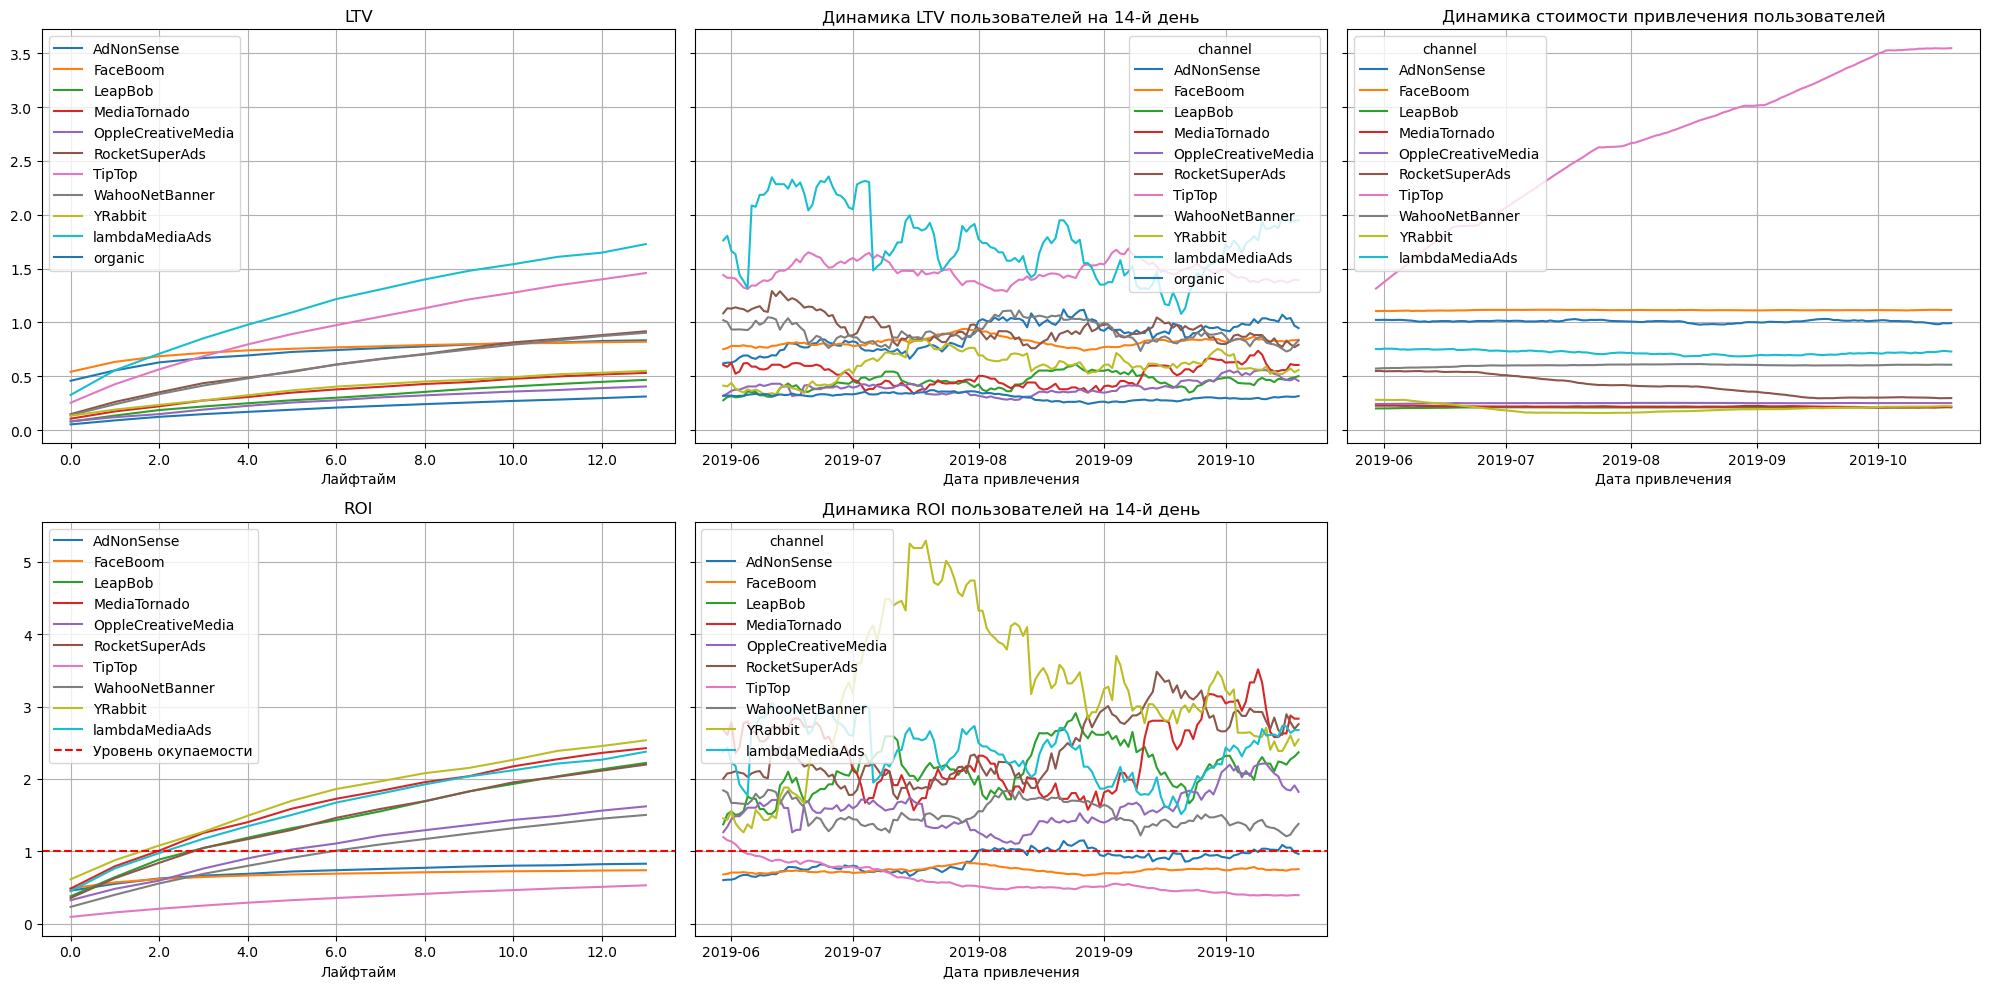

In [76]:
plot_ltv_roi(result_grouped_ltv, result_in_time_ltv, roi_grouped, roi_in_time, 14, 30)

Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

In [78]:
conv_result_raw, conv_result_grouped, conversation_history = \
get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, ['channel'])

In [79]:
retention_result_raw, retention_result_grouped, retention_history = \
get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, ['channel'])

In [80]:
conv_result_grouped.sort_values(by=13, ascending=False)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
FaceBoom,27544,0.098315,0.107138,0.110841,0.112475,0.113999,0.115234,0.116033,0.116831,0.117376,0.117957,0.118429,0.118683,0.119010,0.119336
AdNonSense,3702,0.081848,0.091842,0.095894,0.099136,0.101567,0.103458,0.105078,0.105348,0.105889,0.105889,0.106159,0.106699,0.107509,0.107509
lambdaMediaAds,2056,0.059825,0.077821,0.083171,0.087549,0.090953,0.094358,0.098735,0.100195,0.101654,0.103113,0.103113,0.103113,0.103599,0.103599
TipTop,18498,0.048330,0.064710,0.073413,0.078765,0.082712,0.085307,0.087307,0.088766,0.089956,0.091199,0.092118,0.092442,0.092875,0.093416
RocketSuperAds,4251,0.026347,0.042343,0.050341,0.057869,0.061633,0.064691,0.066337,0.067984,0.069631,0.070336,0.072218,0.073159,0.073394,0.073394
WahooNetBanner,8082,0.026602,0.035264,0.041574,0.044791,0.045904,0.047513,0.048750,0.049245,0.050111,0.050730,0.051472,0.051596,0.051596,0.051844
YRabbit,4102,0.023891,0.027304,0.030473,0.031936,0.032667,0.033642,0.034617,0.034861,0.035836,0.035836,0.036324,0.036568,0.036811,0.036811
MediaTornado,4167,0.020878,0.026398,0.027598,0.028558,0.029998,0.031198,0.031198,0.031677,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
LeapBob,8103,0.014316,0.019376,0.022584,0.024806,0.025793,0.026533,0.026904,0.027397,0.028014,0.028508,0.028878,0.028878,0.029002,0.029125


In [81]:
retention_result_grouped.sort_values(by=13)

cohort_size    0         1         2         3  \
payer channel                                                              
False MediaTornado               4019  1.0  0.250062  0.109231  0.063697   
      RocketSuperAds             3916  1.0  0.250511  0.115169  0.061542   
      organic                   52866  1.0  0.253320  0.111981  0.062403   
      TipTop                    16713  1.0  0.252019  0.113744  0.060193   
      YRabbit                    3946  1.0  0.256969  0.115560  0.061328   
      AdNonSense                 3289  1.0  0.251444  0.110672  0.067498   
      FaceBoom                  24182  1.0  0.253618  0.109958  0.064511   
      WahooNetBanner             7654  1.0  0.258950  0.112752  0.064803   
      lambdaMediaAds             1836  1.0  0.264706  0.104031  0.077342   
      LeapBob                    7860  1.0  0.246438  0.120102  0.062341   
      OppleCreativeMedia         7919  1.0  0.241697  0.113651  0.063392   
True  FaceBoom                   3362  1.0  0.306960  0.158239  0.095181   
      AdNonSense                  413  1.0  0.392252  0.230024  0.123487   
      YRabbit                     156  1.0  0.570513  0.538462  0.442308   
      MediaTornado                148  1.0  0.675676  0.493243  0.398649   
      lambdaMediaAds              220  1.0  0.668182  0.609091  0.431818   
      OppleCreativeMedia          220  1.0  0.663636  0.495455  0.463636   
      TipTop                     1785  1.0  0.658824  0.543978  0.471148   
      LeapBob                     243  1.0  0.654321  0.555556  0.444444   
      organic                    1110  1.0  0.689189  0.577477  0.469369   
      RocketSuperAds              335  1.0  0.725373  0.564179  0.516418   
      WahooNetBanner              428  1.0  0.710280  0.588785  0.497664   

                                 4         5         6         7         8  \
payer channel                                                                
False MediaTornado        0.039313  0.023389  0.022642  0.015676  0.013436   
      RocketSuperAds      0.041369  0.024770  0.020174  0.016088  0.010981   
      organic             0.041615  0.028903  0.021223  0.015114  0.012182   
      TipTop              0.040029  0.031233  0.021839  0.014958  0.013582   
      YRabbit             0.037760  0.029143  0.019767  0.016472  0.011151   
      AdNonSense          0.040438  0.029492  0.017026  0.021283  0.011250   
      FaceBoom            0.036804  0.029154  0.021958  0.016417  0.012571   
      WahooNetBanner      0.041416  0.025608  0.021165  0.013588  0.015809   
      lambdaMediaAds      0.040850  0.033224  0.023420  0.014706  0.014706   
      LeapBob             0.040076  0.026081  0.020356  0.015649  0.012468   
      OppleCreativeMedia  0.042935  0.028792  0.020710  0.016795  0.012628   
True  FaceBoom            0.064842  0.048780  0.036288  0.034503  0.024985   
      AdNonSense          0.094431  0.072639  0.050847  0.065375  0.053269   
      YRabbit             0.448718  0.333333  0.301282  0.275641  0.237179   
      MediaTornado        0.391892  0.351351  0.310811  0.243243  0.243243   
      lambdaMediaAds      0.436364  0.368182  0.395455  0.331818  0.350000   
      OppleCreativeMedia  0.445455  0.336364  0.345455  0.336364  0.240909   
      TipTop              0.406162  0.370868  0.336134  0.292997  0.305322   
      LeapBob             0.390947  0.407407  0.341564  0.288066  0.283951   
      organic             0.386486  0.364865  0.347748  0.324324  0.297297   
      RocketSuperAds      0.432836  0.364179  0.352239  0.328358  0.325373   
      WahooNetBanner      0.429907  0.481308  0.378505  0.380841  0.334112   

                                 9        10        11        12        13  
payer channel                                                               
False MediaTornado        0.011197  0.008211  0.007962  0.006967  0.003235  
      RocketSuperAds      0.007916  0.006384  0.008938  0.005618  0.003830  
      organic       

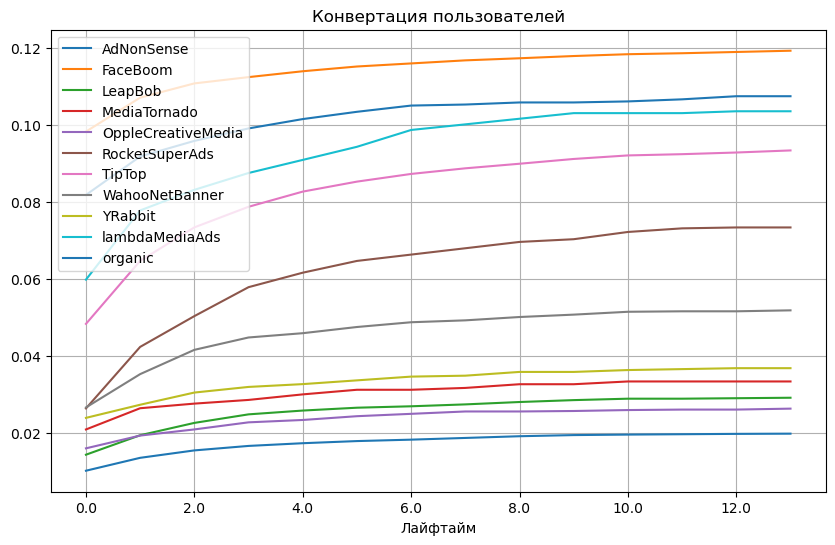

In [82]:
# строим кривую конвертации, исключив размеры когорт
report = conv_result_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 6))
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('Конвертация пользователей')
plt.show()

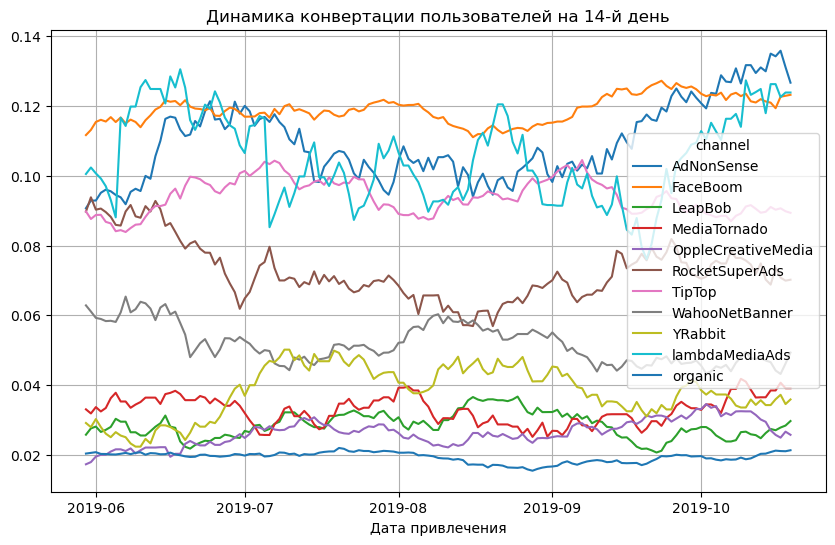

In [83]:
report = conversation_history.pivot_table(index='dt', columns='channel', values=13, aggfunc='mean')
filter_data(report, 30).plot(grid=True, figsize=(10, 6))
plt.xlabel('Дата привлечения')
plt.title('Динамика конвертации пользователей на 14-й день')
  
plt.show()

In [84]:
#функция для построения 4 графиков удержания для платящих и неплатящих пользоватлей
def plot_retention(retention, retention_history, horizon, window=5):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

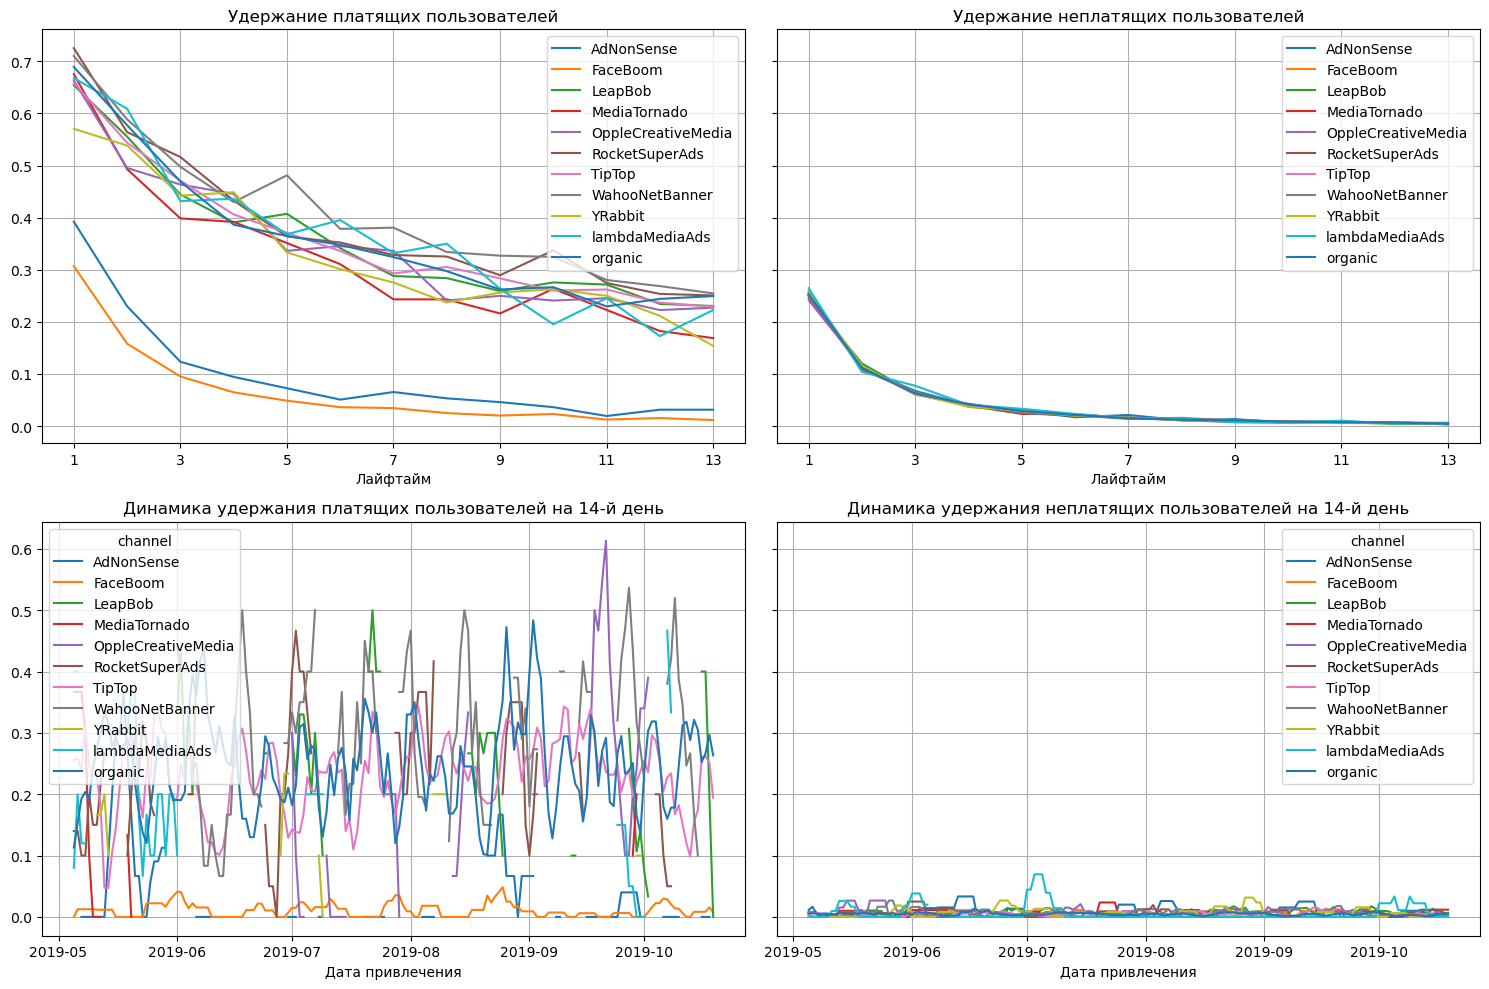

In [85]:
plot_retention(retention_result_grouped, retention_history, 14)

ТОП-4 сети с самой высокой конвертацией  => 9%: FaceBoom, AdNonSense, lambdaMediaAd и TipTop. Самая низкая конвертация в платных пользователей <5% у органического трафика, OppleCreativeMedia, LeapBob, MediaTornado, YRabbit.


Динамика конвертации пользователей на14-й день канала lambdaMediaAds несколько отличается от динамики остальных каналов, что явноым образом могло и повлиять на динамику 14-го дня LTV.

Самые низкие показатели удержания платных пользователей у тех, кто пришел из сетей FaceBoom и AdNonSense. 

Самые высокие -  > 22% - у каналов - WahooNetBanner, RocketSuperAds, органика, LeapBob, TipTop, OppleCreativeMedia, lambdaMediaAds.

Ниже построим графики без учета органического трафика

In [88]:
result_raw_ltv_roi, result_grouped_ltv, result_in_time_ltv, \
roi_grouped, roi_in_time = get_ltv_roi(profiles.query('channel !="organic"'), orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

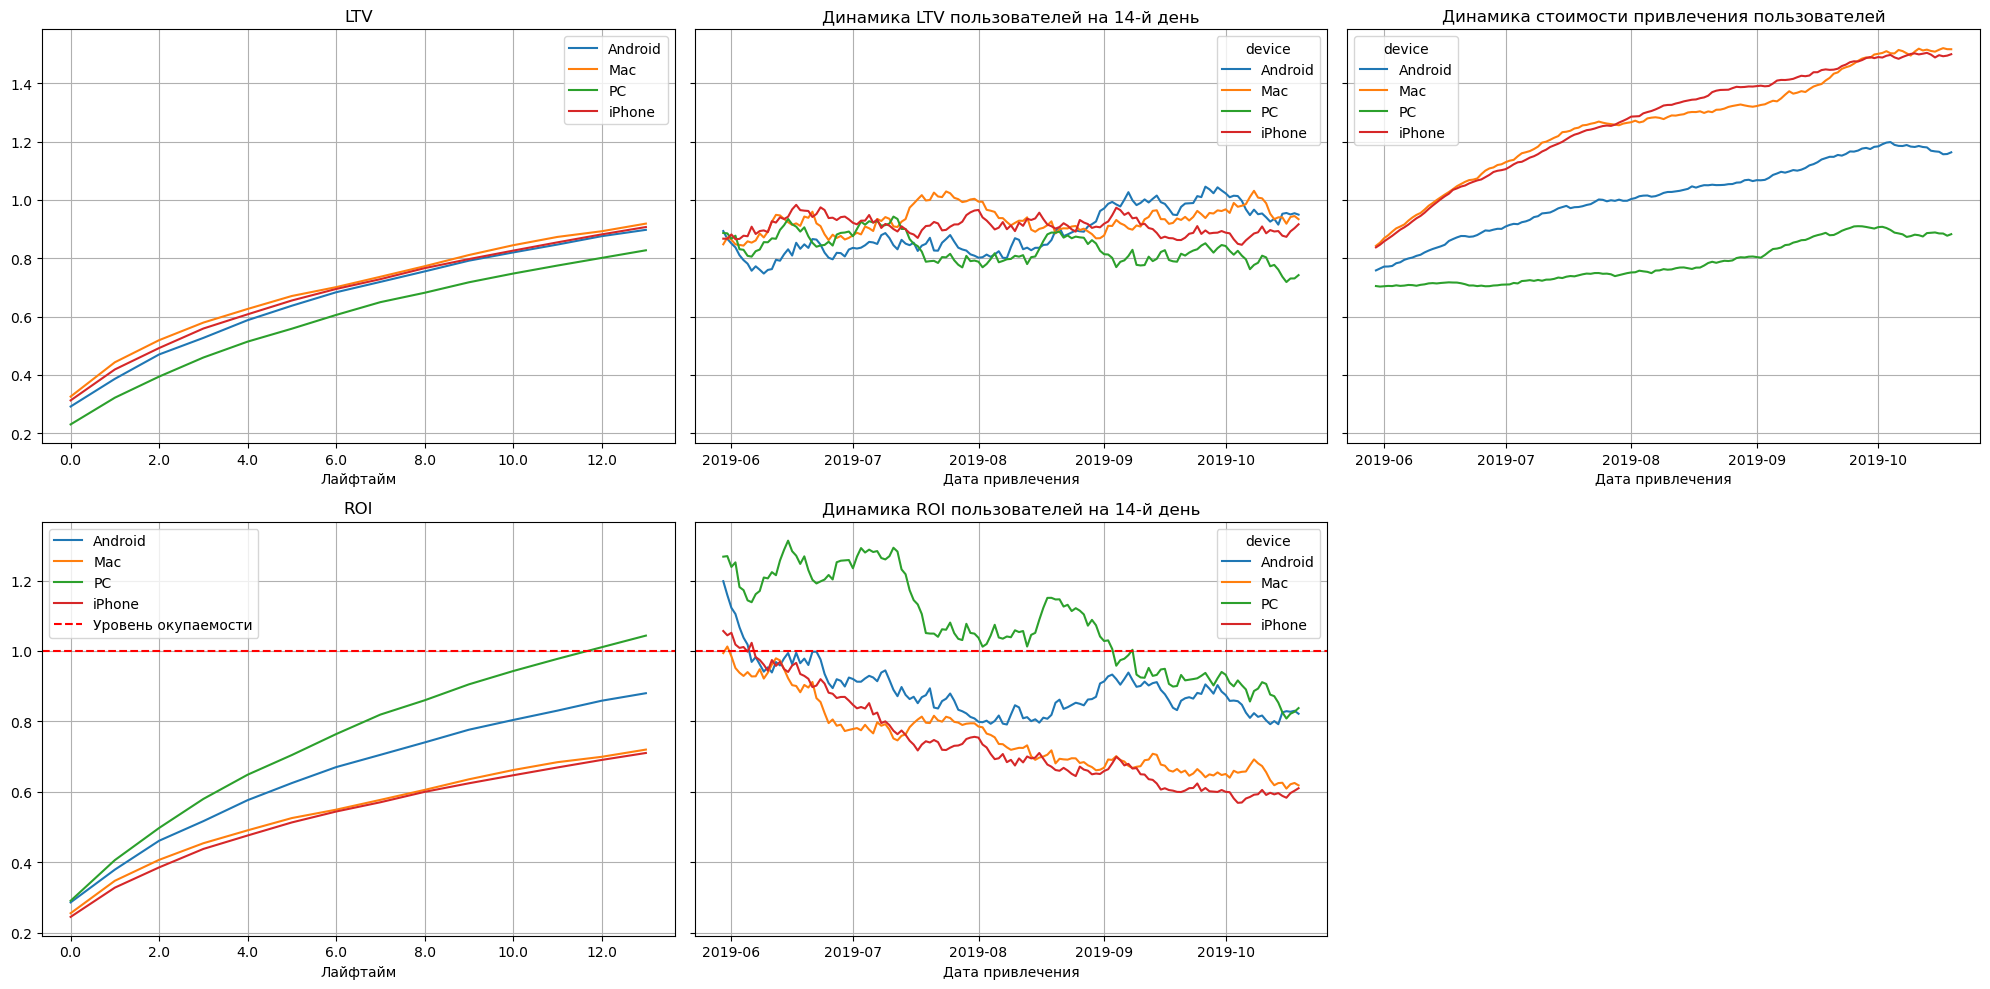

In [89]:
#графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам без органики
plot_ltv_roi(result_grouped_ltv, result_in_time_ltv, roi_grouped, roi_in_time, 14, 30)

LTV, CAC и ROI с разбивкой по устройствам без учета органики

LTV по устройствам постепенно растет и для устройств Android, Mac и Iphone практически не отличаается, чуть ниже LTV для PC. Но вот CAC для Mac и Iphone значительно выше, чем для остальных устройств. 

Самый низкий CAC у PC. При этом стоиомость привлечения растет для всех устройств, и к концу октября для некоторых привлечение пользователей увеличивается в несколько раз. Соответственно, ROI только для  PC к 14-му дню больше единицы, то есть только для PC мы видим, что  окупаемость рекламы при привлечении пользователя этих  устройств. А вот юзеры Mac, Android и Iphone не окупаются к 14-му дню.

Так как стоимость привлечения растет ежемесячно, то на графике ROI 14-го дня в динамике мы видим падение ROI, и к сентябрю ROI для всех устройства становится меньше 1.

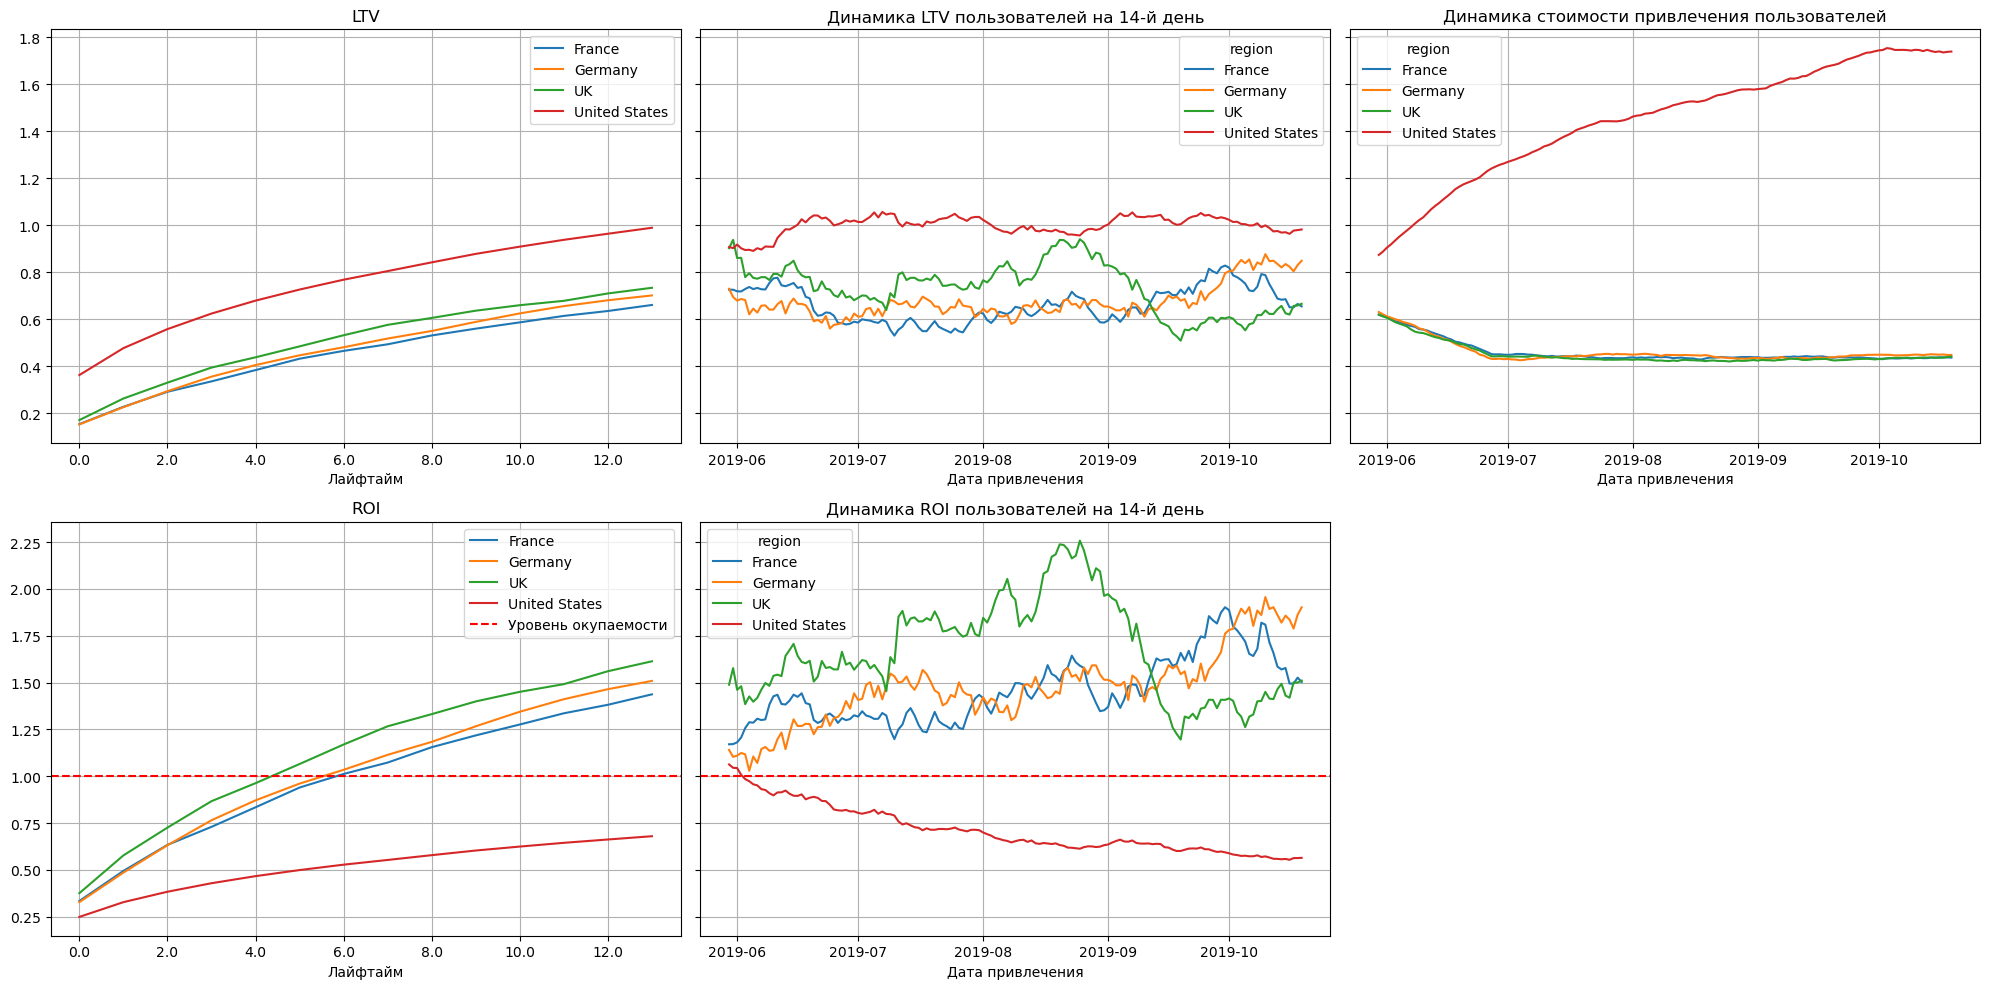

In [91]:
#Графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам без органики
result_raw_ltv_roi, result_grouped_ltv, result_in_time_ltv, \
roi_grouped, roi_in_time = get_ltv_roi(profiles.query('channel !=  "organic"'), orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])
plot_ltv_roi(result_grouped_ltv, result_in_time_ltv, roi_grouped, roi_in_time, 14, 30)

LTV, CAC и ROI с разбивкой по странам без органики

LTV по устройствам стабильно растет, и для United State оно выше, чем для других стран. При этом CAC драматично растет именно при привлечении пользователей USA, а для пользователей других стран практически остается без изменений. Соответственно, к 6 дню ROI для всех стран, кроме USA > 1, а ROI для USA так и не достиг уровня окупаемости. Эту же тенденцию мы видим на графике ROI 14-го дня в динамике.

In [93]:
#расходы на рекламу по странам, устройствам и каналам
profiles.pivot_table(index=['channel'], columns='region', 
                     values='acquisition_cost', aggfunc='sum', margins=True).sort_values(by='All')

region,France,Germany,UK,United States,All
channel,,,,,
organic,0.000000,0.000000,0.000000,0.00,0.00
YRabbit,NaN,NaN,NaN,944.22,944.22
MediaTornado,NaN,NaN,NaN,954.48,954.48
lambdaMediaAds,535.138248,471.287952,551.173800,NaN,1557.60
LeapBob,628.045578,529.946557,639.607864,NaN,1797.60
RocketSuperAds,NaN,NaN,NaN,1833.00,1833.00
OppleCreativeMedia,747.336327,640.733464,763.180209,NaN,2151.25
AdNonSense,1376.316788,1229.282545,1305.650668,NaN,3911.25
WahooNetBanner,1789.137006,1552.972718,1808.890277,NaN,5151.00


In [94]:
# % затрат на рекламу в US
round(profiles.query('region == "United States"')\
['acquisition_cost'].sum()/profiles['acquisition_cost'].sum()*100, 0)

86.0

In [95]:
# % затрат на рекламу в US на сети  FaceBoom и  TipTop
round(profiles.query('region == "United States" & channel == "FaceBoom"  | channel == "TipTop"')['acquisition_cost'].sum() / \
profiles.query('region == "United States"')['acquisition_cost'].sum()*100, 0)

96.0

In [96]:
profiles.loc[profiles['channel']. isin(['FaceBoom', 'TipTop'])].\
pivot_table(index=['device'], columns='channel', values='acquisition_cost', 
            aggfunc=['sum', 'mean'])

sum                    mean          
channel      FaceBoom        TipTop  FaceBoom    TipTop
device                                                 
Android   6540.836409  10862.074589  1.113334  2.793025
Mac       8088.075975  13550.207414  1.113293  2.811246
PC        3349.226836   5681.471760  1.113440  2.823793
iPhone   14467.460781  24657.546238  1.113224  2.789315

В United State привлекали трафик 4 сети: YRabbit, MediaTornado, RocketSuperAds, FaceBoom и  TipTop. Остальные каналы работали в Европе - France, Germany, UK.
86% от всех затрат пришлось на привлечение в United States, а 96% всех затрат в US пришлось на каналы FaceBoom и  TipTop.

In [98]:
profiles.loc[profiles['channel'].isin(['RocketSuperAds'])].\
pivot_table(index=['device'], columns='channel', values='acquisition_cost', 
            aggfunc=['sum', 'mean'])

,sum,mean
channel,RocketSuperAds,RocketSuperAds
device,,
Android,382.811147,0.412512
Mac,465.718030,0.409602
PC,190.368256,0.408516
iPhone,794.102568,0.414242


In [99]:
profiles.loc[profiles['channel'].isin(['YRabbit'])].\
pivot_table(index=['device'], columns='channel', values='acquisition_cost', 
            aggfunc=['sum','mean'])

,sum,mean
channel,YRabbit,YRabbit
device,,
Android,189.897420,0.219535
Mac,239.321976,0.218160
PC,104.414113,0.216627
iPhone,410.586491,0.219800


In [100]:
result_raw_ltv_roi, result_grouped_ltv, result_in_time_ltv, \
roi_grouped, roi_in_time = get_ltv_roi(profiles, orders, datetime(2019, 11, 1).date(), 14)

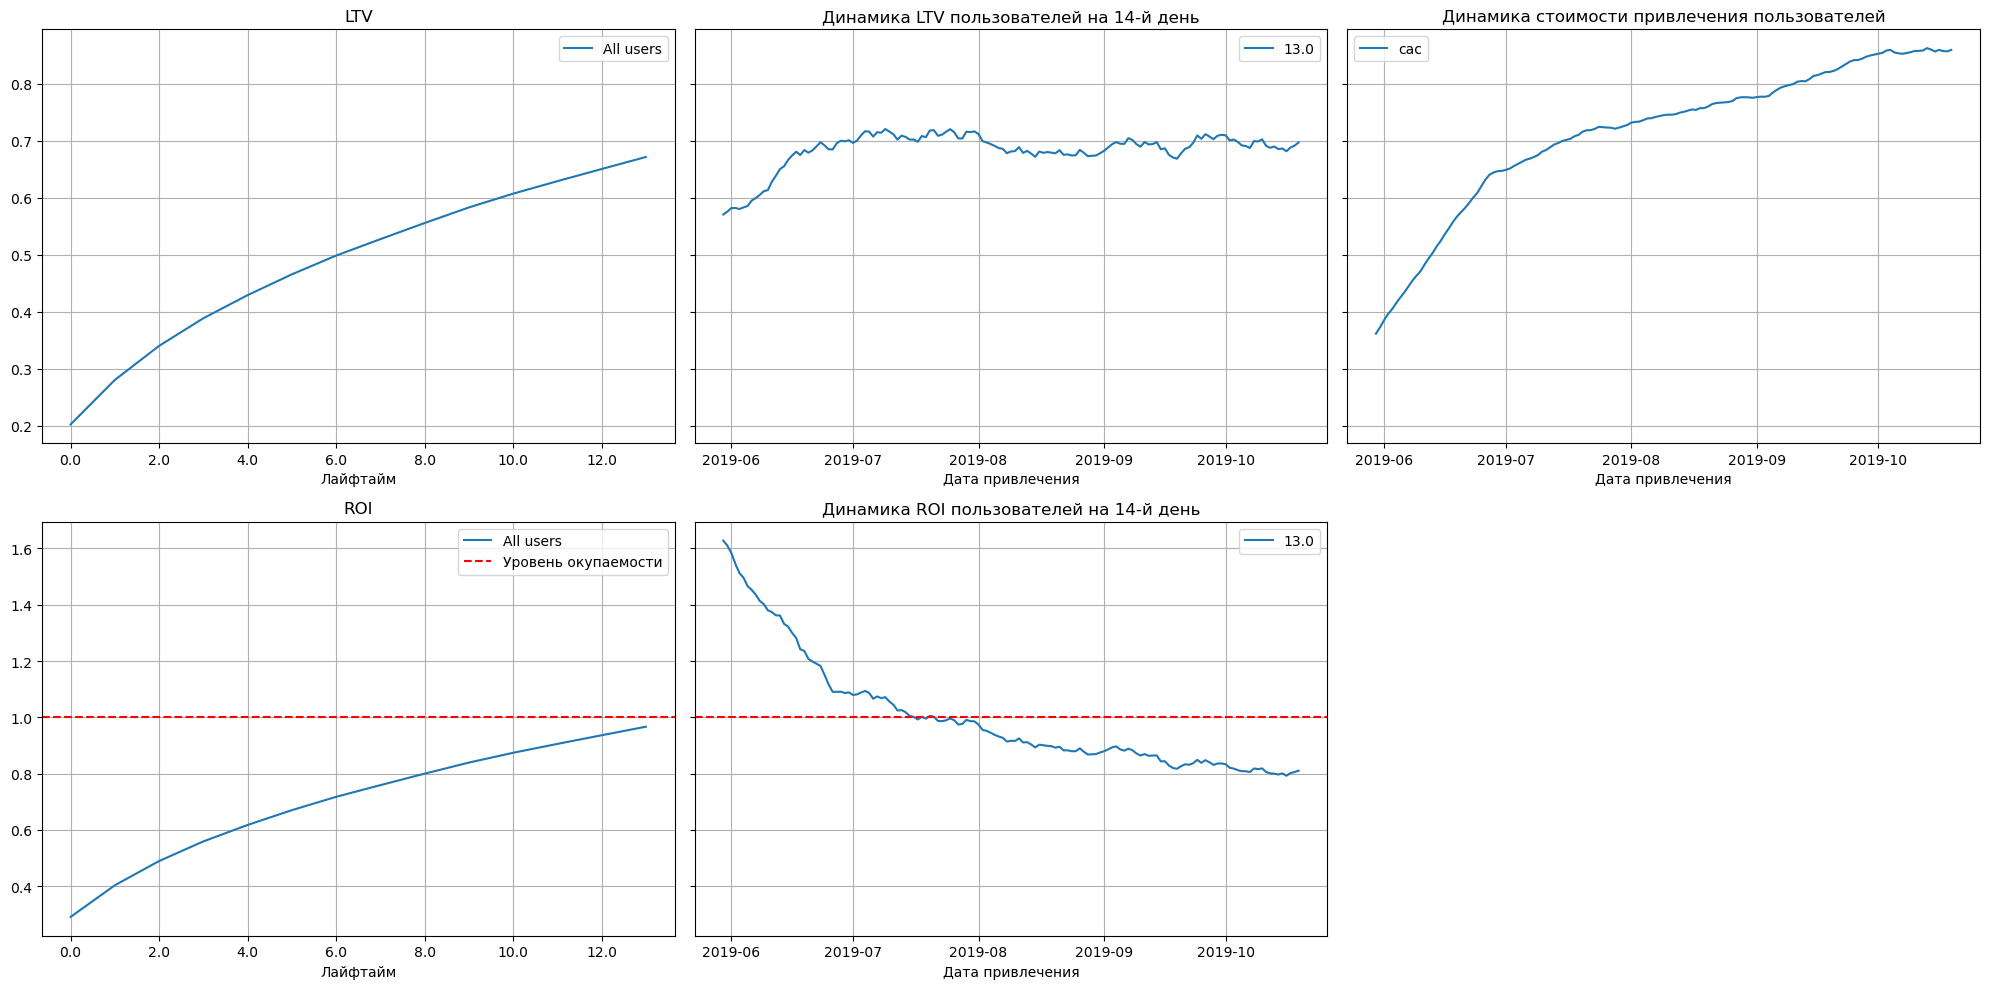

In [101]:
plot_ltv_roi(result_grouped_ltv, result_in_time_ltv, roi_grouped, roi_in_time, 14, 30)

In [102]:
#средний LTV на 14 день
result_in_time_ltv[13].mean()

0.6728489137447448

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Количество пользователей
Наибольшее количество пользователей в приложение приходит из США, и именно в этой стране в целом выше доля платящих - на уровне 7%, меньше всего пользователей из Германии.

Девайсы
Наибольшее популярный девайс - это айфон, у всех пользователей - платящих и неплатящих, с долей платящих пользователей 6,2%. Самая низкая доля платящих - это клиенты PC - 5%.
Обращает внимание на себя тот факт, что количество Mac и PC пользователей не очень отличается, но при этом платных пользователей Мака больше, чем PС: 6,3% vs 5 %

Наибольшее количество клиентов привлекается органическим трафиком, но он приносят меньше всего платящих клиентов - 2%.

Второй по полулярности источник пользователей - это FaceBoom с наибольшей долей платных юзеров - 12%, третий - TipTop, с долей платных -  9,6%. А вот, например, lambdaMediaAds тоже с высокой долей платных пользователей - 10,5% приводит наименьшее число пользователей среди всех каналов.

Затраты на маркетинг
Затраты на маркетинг составили 105497.30$. ТОП затрат - это сети TipTop, FaceBoom - 52% и 31% соответственно.
На графике мы видим в динамике, как растут расходы на эти два топовых канала привлечения и практически не меняются расходы на остальные каналы.

LTV
Наиболее высокий LTV у пользователей, которые пришли из 2 каналов: lambdaMediaAds и TipTop - это 1,72 и 1,46 на 14-й день. Наименьший LTV - у юзеров, которые пришли органически (0,31 на 14-й день), а также через каналы OppleCreativeMedia (0,4 на 14-й день) и LeapBob (0,47 на 14-й день). 
А вот LTV пользователей самого затратного канала FaceBoom с наибольшей долей платных пользоваталей на 14 дней, скажем, довольно средний- 0,82.
График, отражающий в динамике LTV пользователей на 14-й день по каналам показывает, что к июлю - августу LTV немного снижается, потом растет, а в конце сентября  - начале октября опять практически все каналы показывают небольшое снижение, а дальше - небольшой рост. Такое поведение может как раз отражать сезоннность пользования услугами приложения. На этом фоне выделяется неравномерные скачки LTV пользователей из lambdaMediaAds, которые не совсем соответствуют общему тренду.

CAC
Уровень стоимости привлечения пользователя CAC в динамике для всех каналов, кроме TipTop, остается неизменным. TipTop, FaceBoom  - самый высокий  CAC. Самый низкий - у каналов LeapBob, YRabbit, MediaTornado и OppleCreativeMedia

ROI. Окупаемость привлечения происходит на 3-6 день.
Сети с самым высоким ROI > 200%: YRabbit, MediaTornado, lambdaMediaAds, LeapBob и RocketSuperAds. А три сети не окупились совсем: AdNonSense, FaceBoom, TipTop.
На графике с динамикой ROI на 14-й день выделяется лидирующая сеть YRabbit, у которых ROI в июле и августе достигает пиковых значений.

Конвертация
ТОП-4 сети с самой высокой конвертацией  => 9%: FaceBoom, AdNonSense, lambdaMediaAd и TipTop. Самая низкая конвертация в платных пользователей <5% у органического трафика, OppleCreativeMedia, LeapBob, MediaTornado, YRabbit.
Динамика конвертации пользователей на14-й день канала lambdaMediaAds несколько отличается от динамики остальных каналов, что явноым образом могло и повлиять на динамику 14-го дня LTV.
Удержание
Самые низкие показатели удержания платных пользователей у тех, кто пришел из сетей FaceBoom и AdNonSense. Самые высокие -  > 22% - у каналов - WahooNetBanner, RocketSuperAds, органика, LeapBob, TipTop, OppleCreativeMedia, lambdaMediaAds.

LTV, CAC и ROI с разбивкой по устройствам без учета органики

LTV по устройствам постепенно растет и для устройств Android, Mac и Iphone практически не отличаается, чуть ниже LTV для PC. Но вот CAC для Mac и Iphone значительно выше, чем для остальных устройств. 

Самый низкий CAC у PC. При этом стоиомость привлечения растет для всех устройств, и к концу октября для некоторых привлечение пользователей увеличивается в несколько раз. Соответственно, ROI только для  PC к 14-му дню больше единицы, то есть только для PC мы видим, что  окупаемость рекламы при привлечении пользователя этих  устройств. А вот юзеры Mac, Android и Iphone не окупаются к 14-му дню.

Так как стоимость привлечения растет ежемесячно, то на графике ROI 14-го дня в динамике мы видим падение ROI, и к сентябрю ROI для всех устройства становится меньше 1.


LTV, CAC и ROI с разбивкой по странам без органики

LTV по устройствам стабильно растет, и для United State оно выше, чем для других стран. При этом CAC драматично растет именно при привлечении пользователей USA, а для пользователей других стран практически остается без изменений. Соответственно, к 6 дню ROI для всех стран, кроме USA > 1, а ROI для USA так и не достиг уровня окупаемости. Эту же тенденцию мы видим на графике ROI 14-го дня в динамике.

В United State привлекали трафик 5 каналов: YRabbit, MediaTornado, RocketSuperAds, FaceBoom и  TipTop. Остальные каналы работали в Европе - France, Germany, UK.
86% от всех затрат пришлось на привлечение в United States, а 96% всех затрат в US пришлось на каналы FaceBoom и  TipTop.



Основными причинами неэффективности,  акцент на привлечение пользователей из United State, при этом эффективность отслеживалась, скорее всего,  по едиснственному показателю - конвертации в платные пользователи. В результате чего весь практически весь  рекламный был затрачен на две сети: FaceBoom и TipTop. И так как игнорировались такие показатели как CAC, который, как показал график, драматически рос в динамике для этих двух сетей, в целом рекламная компания не окупилась, не смотря на хорошие показатели как LTV пользоватей приложения, так и конвертацию и retention.

РЕКОМЕНДАЦИИ:
Не следует концентироваться на рынке одной страны, а распределять рекламые затраты более раваномерно по регионам (странам).

Необходимо в динамике (ежнедельно или хотя каждые 14 дней) во время проведения рекламной кампани посмтоянно отслеживать, как минимум, два показателя, а не один: конвертацию  и стомимость привлечения (СAC) пр ка. Стомость привлечения не должна драматически расти, и тем более не должно быть большой разнице в стоимости привлечения по каналам. 
Несмотря на то, что у пользователй разных каналов профили отличаются конвертацией, удержанием и LTV - это различие не настолько большое  - не в разы, чтобы обеспечить окупаемость привлечения. В дальнейшем можно  определить максимальный  порог CAC,  примерно около 65 центов (ориентруясь на средний LTV на 14-1 жень), при котором реклама в любом случае не будет окупаться.
Кроме того, необходимо проводить периодическую оценку рекламной кампании  - каждый две или четыре недели с учетом всех параметров: LTV и ROI с разбивкой по каналам привлечения, устройствами и странам с тем, чтобы корректировать цели кампании и переориентировать с менее успешных каналов на более успешные, привлекать пользователей устройств с наибольшим LTV, а также с тем, чтобы были выполнены возможные продуктовые и маркетинговые задачи, такие как увеличение количества пользователей в опреденном регионе, на определенном устройстве, в определенный период.

Среди каналов в US стоит обратить внимание на MediaTornado: самый высокий ROI, самая высокая конвертация, самый низкий CAC. RocketSuperAds  - этот канал для US привлекает пользователей с самым высоким процентов удержания, хорошей конвертацией 6-9% в зависимости от устройства и неплохим LTV. То есть мы тут может говорить о том, что канал привлекает довольно-таки качественных пользователей.
У YRabbit - самый низкий CAC и, видимо, за счет этого -  самый высокий ROI, так как конвертация  - самая низкая, но выше, чем у органики, особенно для Anroid. В целом, это тоже может быть рабочая схема - пусть аудитория сети не совсем целевая, но цели кампании - достигаются.

Что касается Европы, здесь работали следующие каналы: lambdaMediaAds, LeapBob, OppleCreativeMedia, AdNonSense и WahooNetBanner.
lambdaMediaAds - явный лидер. У него самая высокая конвертация, высокие показатели удержания, самый высокий LTV - 1,72$ и самый высокий ROI.
 У LeapBob фактически показатели органического трафика, то есть тут тоже можно говорить о зря потраченных бюджетах, не смотря на высокий ROI.
OppleCreativeMedia - низкий CAC, но и низкая конвертация при высоких показателях удержания, возможно, есть смысл посмотреть на показатели LTV, удержания и конвертации этого канала по устройствам, чтобы в дальнейшем решить, надо ли привлекать пользователей всех устройств через него или отдать предпочтения определенным.
AdNonSense - высокая конвертация, самое низкие цифры удержания, реклама не окупилась, так как LTV довольно низкий. Пользователи конвертируются быстро, но также быстро отваливаются, видимо, все-таки приходи не целевая аудитория. Можно отдельно подумать над причинами.
WahooNetBanner - хороший середнячок. Звезд с неба не хватает, но все показатели в целом устройчивые. Но, возможно, после изменений в рекламной кампании окажется в аутсайдерах. 